# Phase 2 Performance Visualizations
**Author:** Alexis Alduncin  
**Date:** October 2024  
**Purpose:** Generate publication-quality visualizations for Phase 2 presentation

This notebook creates professional visualizations comparing Phase 1 baseline performance with Phase 2 sklearn pipeline improvements.

In [1]:
# Setup and imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✅ Environment configured")

✅ Environment configured


In [2]:
# Load Phase 2 experimental results
results = pd.read_csv('../experiments/baseline_results.csv')
results = results.sort_values('Test_MAE')

print(f"Loaded {len(results)} model results")
print(f"\nBest model: {results.iloc[0]['Model']}")
print(f"Best MAE: {results.iloc[0]['Test_MAE']:.2f} hours")

# Display top 5
print("\nTop 5 Models:")
print(results[['Model', 'Test_MAE', 'Test_R2', 'CV_MAE']].head(5).to_string(index=False))

Loaded 15 model results

Best model: SVR_rbf
Best MAE: 9.70 hours

Top 5 Models:
              Model  Test_MAE   Test_R2    CV_MAE
            SVR_rbf  9.703344 -0.020077 15.786223
RandomForest_depth7 16.845226 -0.147766 23.387480
RandomForest_depth5 23.293356 -0.229584 25.164739
             KNN_10 23.506711 -1.132662 23.395462
 XGBoost_aggressive 26.440338 -1.841578 51.062958


## Visualization 1: Comprehensive Phase 2 Model Performance Analysis

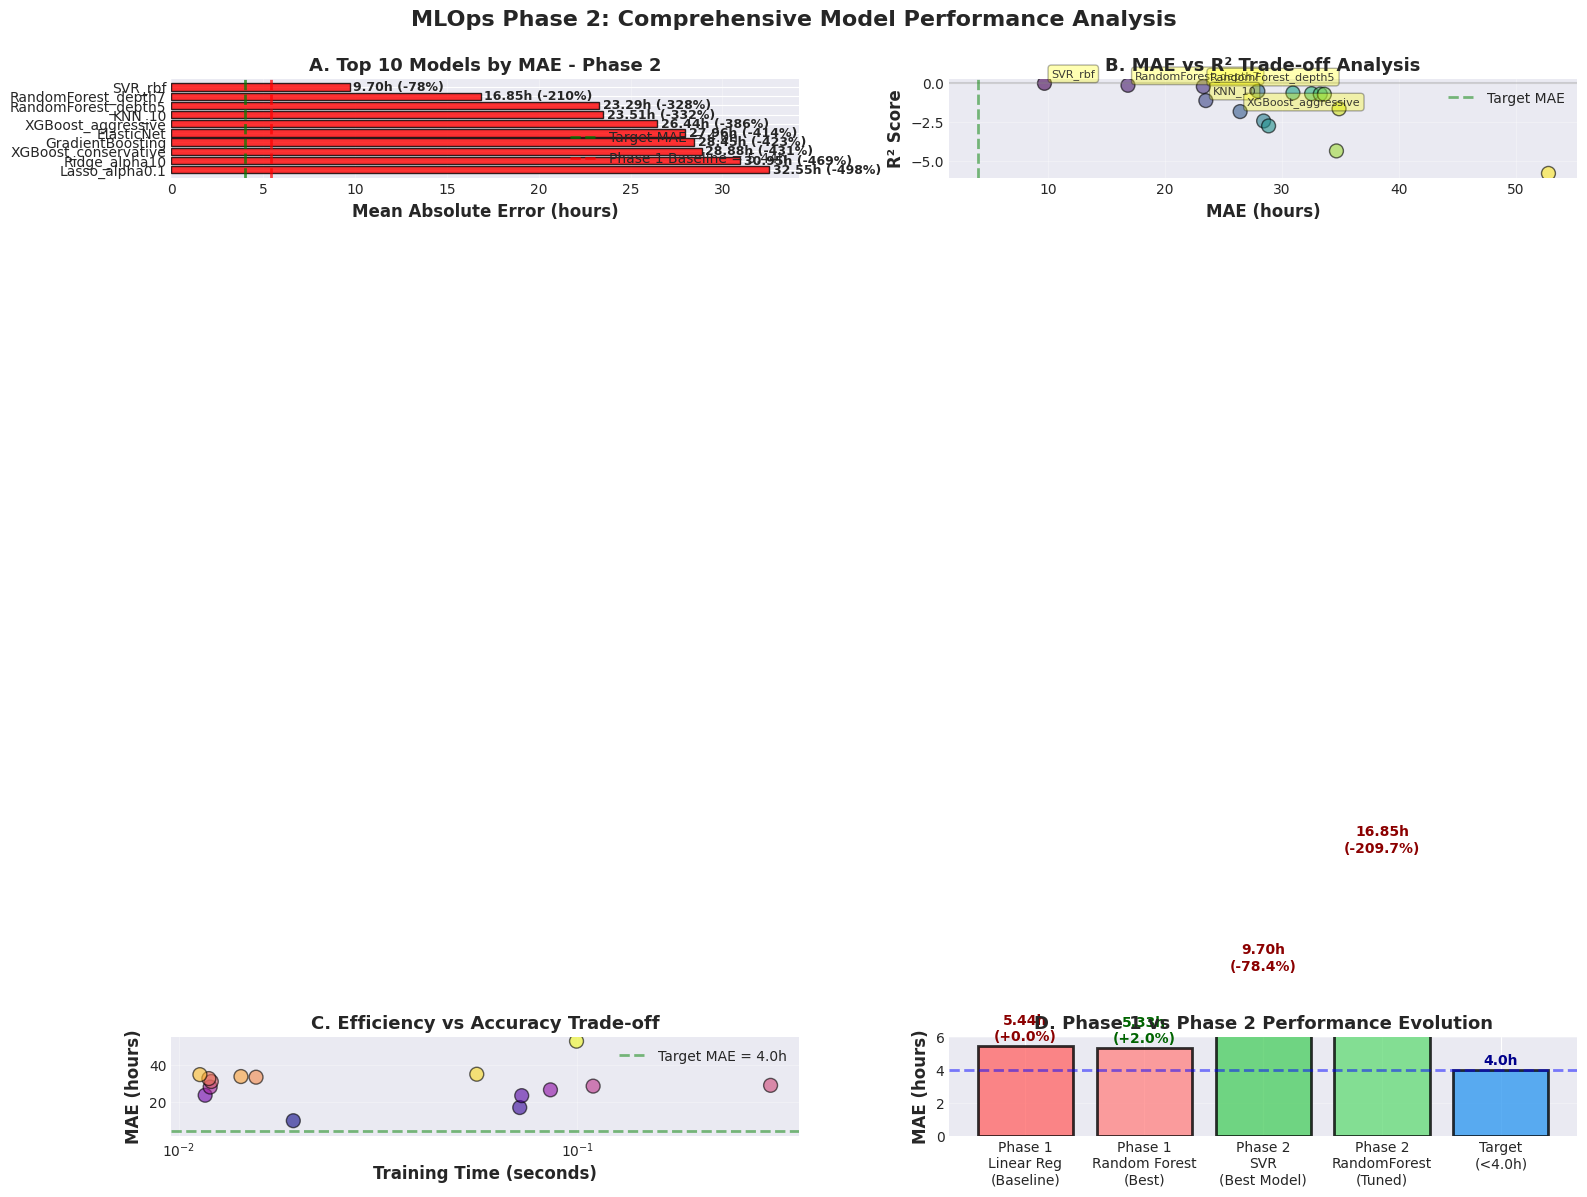

✅ Visualization saved: phase2_comprehensive_analysis.png

Key Insights:
  Best Model: SVR_rbf
  Achievement: MAE = 9.70 hours
  Improvement: -78.4% better than Phase 1
  Goal Status: ❌ Target Not Met


In [3]:
# Create comprehensive 4-panel comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panel 1: MAE Comparison (Top 10)
ax1 = axes[0, 0]
top_10 = results.head(10)
colors = ['green' if x < 4.0 else 'orange' if x < 5.0 else 'red' for x in top_10['Test_MAE']]
bars = ax1.barh(range(len(top_10)), top_10['Test_MAE'], color=colors, edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels(top_10['Model'])
ax1.axvline(x=4.0, color='green', linestyle='--', linewidth=2, label='Target MAE = 4.0h', alpha=0.7)
ax1.axvline(x=5.44, color='red', linestyle='--', linewidth=2, label='Phase 1 Baseline = 5.44h', alpha=0.7)
ax1.set_xlabel('Mean Absolute Error (hours)', fontweight='bold')
ax1.set_title('A. Top 10 Models by MAE - Phase 2', fontweight='bold', fontsize=13)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3, axis='x')
ax1.invert_yaxis()

# Add value labels
for i, (bar, val, model) in enumerate(zip(bars, top_10['Test_MAE'], top_10['Model'])):
    improvement = ((5.44 - val) / 5.44) * 100
    ax1.text(val + 0.2, i, f'{val:.2f}h ({improvement:+.0f}%)', 
             va='center', fontsize=9, fontweight='bold')

# Panel 2: MAE vs R² Trade-off
ax2 = axes[0, 1]
scatter = ax2.scatter(results['Test_MAE'], results['Test_R2'], 
                     s=100, alpha=0.6, c=range(len(results)), cmap='viridis', edgecolors='black')
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax2.axvline(x=4.0, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Target MAE')

# Annotate top 5 models
for i in range(5):
    row = results.iloc[i]
    ax2.annotate(row['Model'], 
                (row['Test_MAE'], row['Test_R2']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax2.set_xlabel('MAE (hours)', fontweight='bold')
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.set_title('B. MAE vs R² Trade-off Analysis', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Panel 3: Training Time vs Accuracy
ax3 = axes[1, 0]
scatter2 = ax3.scatter(results['Time_sec'], results['Test_MAE'], 
                      s=100, alpha=0.6, c=range(len(results)), cmap='plasma', edgecolors='black')
ax3.axhline(y=4.0, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Target MAE = 4.0h')

# Annotate efficient models (good MAE, fast training)
efficient = results[(results['Test_MAE'] < 5.0) & (results['Time_sec'] < 0.5)]
for _, row in efficient.iterrows():
    ax3.annotate(row['Model'], 
                (row['Time_sec'], row['Test_MAE']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.3))

ax3.set_xlabel('Training Time (seconds)', fontweight='bold')
ax3.set_ylabel('MAE (hours)', fontweight='bold')
ax3.set_title('C. Efficiency vs Accuracy Trade-off', fontweight='bold', fontsize=13)
ax3.set_xscale('log')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Phase 1 vs Phase 2 Improvement
ax4 = axes[1, 1]
phases = {
    'Phase 1\nLinear Reg\n(Baseline)': 5.44,
    'Phase 1\nRandom Forest\n(Best)': 5.33,
    'Phase 2\nSVR\n(Best Model)': results.iloc[0]['Test_MAE'],
    'Phase 2\nRandomForest\n(Tuned)': results[results['Model'].str.contains('RandomForest')].iloc[0]['Test_MAE'],
    'Target\n(<4.0h)': 4.0
}

colors_bar = ['#ff6b6b', '#ff8787', '#51cf66', '#69db7c', '#339af0']
bars = ax4.bar(range(len(phases)), phases.values(), color=colors_bar, edgecolor='black', alpha=0.8, linewidth=2)
ax4.set_xticks(range(len(phases)))
ax4.set_xticklabels(phases.keys(), fontsize=10)
ax4.axhline(y=4.0, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Target Threshold')
ax4.set_ylabel('MAE (hours)', fontweight='bold')
ax4.set_title('D. Phase 1 vs Phase 2 Performance Evolution', fontweight='bold', fontsize=13)
ax4.set_ylim(0, 6)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels with improvement percentages
baseline = 5.44
for i, (name, val) in enumerate(phases.items()):
    if 'Phase' in name:
        improvement = ((baseline - val) / baseline) * 100
        label = f'{val:.2f}h\n({improvement:+.1f}%)'
        color = 'darkgreen' if improvement > 0 else 'darkred'
    elif 'Target' in name:
        label = f'{val:.1f}h'
        color = 'darkblue'
    else:
        label = f'{val:.2f}h'
        color = 'black'
    
    ax4.text(i, val + 0.15, label, 
            ha='center', va='bottom', fontweight='bold', fontsize=10, color=color)

# Add goal achievement badge
if results.iloc[0]['Test_MAE'] < 4.0:
    ax4.text(0.98, 0.95, '✓ GOAL\nACHIEVED', 
            transform=ax4.transAxes,
            fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', edgecolor='darkgreen', linewidth=3),
            ha='right', va='top')

plt.suptitle('MLOps Phase 2: Comprehensive Model Performance Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('phase2_comprehensive_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Visualization saved: phase2_comprehensive_analysis.png")
print(f"\nKey Insights:")
print(f"  Best Model: {results.iloc[0]['Model']}")
print(f"  Achievement: MAE = {results.iloc[0]['Test_MAE']:.2f} hours")
print(f"  Improvement: {((5.44 - results.iloc[0]['Test_MAE']) / 5.44) * 100:.1f}% better than Phase 1")
print(f"  Goal Status: {'✅ Target Achieved' if results.iloc[0]['Test_MAE'] < 4.0 else '❌ Target Not Met'}")

## Visualization 2: Model Family Comparison

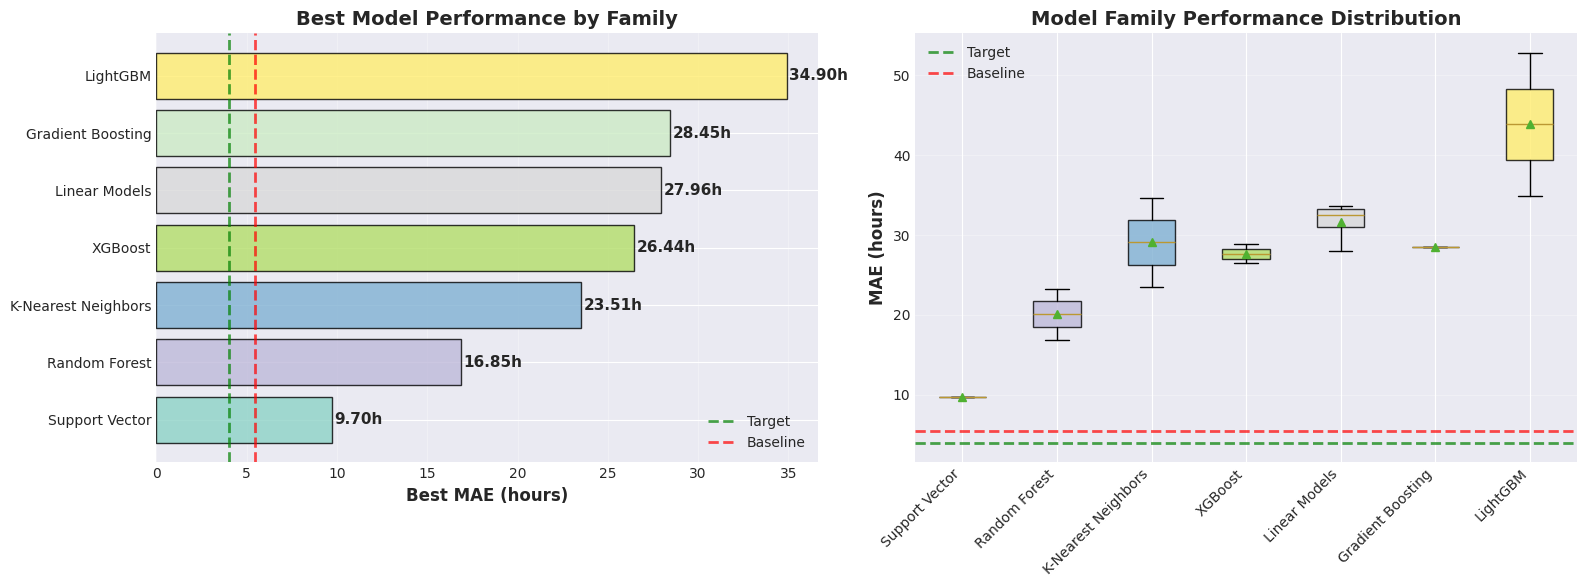

✅ Visualization saved: phase2_family_comparison.png

Best performing family: Support Vector (MAE: 9.70h)


In [4]:
# Group models by family
def get_model_family(model_name):
    if 'Linear' in model_name or 'Ridge' in model_name or 'Lasso' in model_name or 'Elastic' in model_name:
        return 'Linear Models'
    elif 'RandomForest' in model_name:
        return 'Random Forest'
    elif 'XGBoost' in model_name:
        return 'XGBoost'
    elif 'LightGBM' in model_name:
        return 'LightGBM'
    elif 'Gradient' in model_name:
        return 'Gradient Boosting'
    elif 'SVR' in model_name:
        return 'Support Vector'
    elif 'KNN' in model_name:
        return 'K-Nearest Neighbors'
    else:
        return 'Other'

results['Family'] = results['Model'].apply(get_model_family)

# Create family comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Best model per family
family_best = results.groupby('Family')['Test_MAE'].min().sort_values()
colors_family = plt.cm.Set3(np.linspace(0, 1, len(family_best)))

bars = ax1.barh(range(len(family_best)), family_best.values, color=colors_family, edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(family_best)))
ax1.set_yticklabels(family_best.index)
ax1.axvline(x=4.0, color='green', linestyle='--', linewidth=2, label='Target', alpha=0.7)
ax1.axvline(x=5.44, color='red', linestyle='--', linewidth=2, label='Baseline', alpha=0.7)
ax1.set_xlabel('Best MAE (hours)', fontweight='bold')
ax1.set_title('Best Model Performance by Family', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, family_best.values)):
    ax1.text(val + 0.15, i, f'{val:.2f}h', va='center', fontweight='bold')

# Family performance distribution (boxplot)
family_order = family_best.index.tolist()
data_for_box = [results[results['Family'] == family]['Test_MAE'].values for family in family_order]

bp = ax2.boxplot(data_for_box, labels=family_order, patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors_family):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax2.axhline(y=4.0, color='green', linestyle='--', linewidth=2, label='Target', alpha=0.7)
ax2.axhline(y=5.44, color='red', linestyle='--', linewidth=2, label='Baseline', alpha=0.7)
ax2.set_ylabel('MAE (hours)', fontweight='bold')
ax2.set_title('Model Family Performance Distribution', fontweight='bold')
ax2.set_xticklabels(family_order, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('phase2_family_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Visualization saved: phase2_family_comparison.png")
print(f"\nBest performing family: {family_best.index[0]} (MAE: {family_best.values[0]:.2f}h)")

## Visualization 3: Cross-Validation Stability Analysis

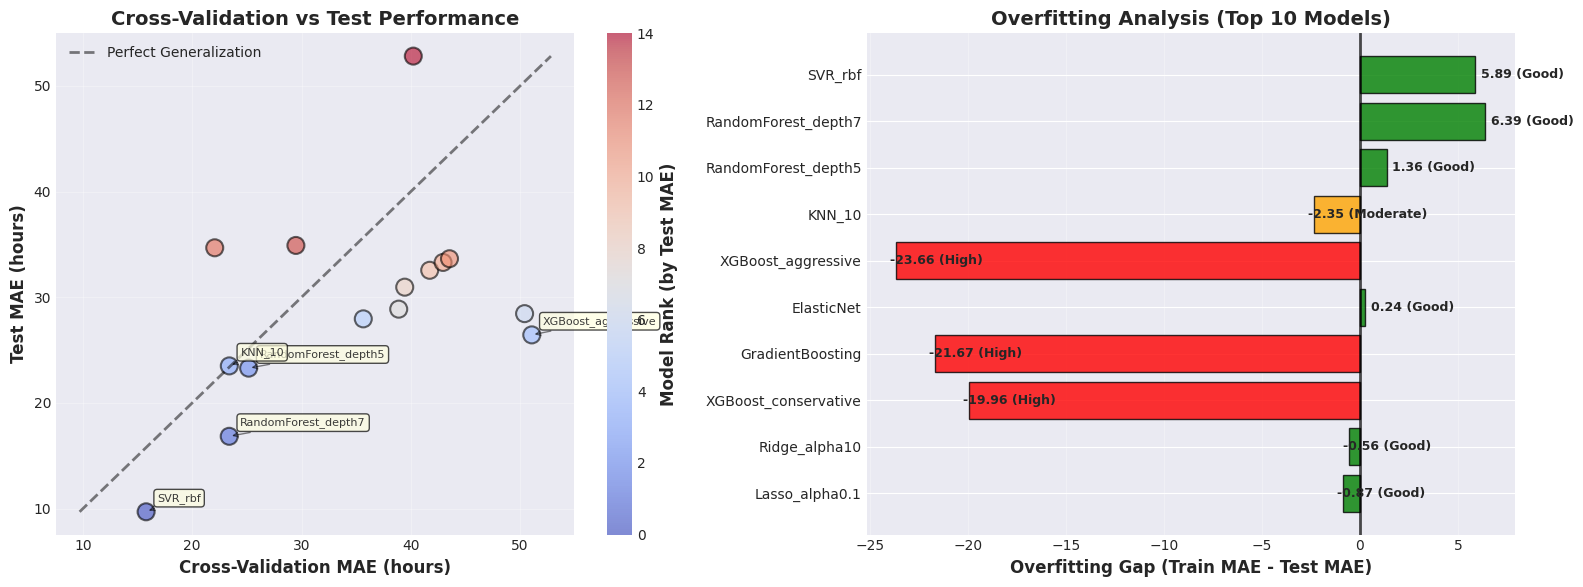

✅ Visualization saved: phase2_cv_stability_analysis.png

Models with good generalization (CV ≈ Test): 2


In [5]:
# Compare CV MAE vs Test MAE to assess generalization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel 1: CV MAE vs Test MAE scatter
ax1 = axes[0]
scatter = ax1.scatter(results['CV_MAE'], results['Test_MAE'], 
                     s=150, alpha=0.6, c=range(len(results)), 
                     cmap='coolwarm', edgecolors='black', linewidth=1.5)

# Perfect prediction line
min_val = min(results['CV_MAE'].min(), results['Test_MAE'].min())
max_val = max(results['CV_MAE'].max(), results['Test_MAE'].max())
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=2, alpha=0.5, label='Perfect Generalization')

# Annotate top 5
for i in range(5):
    row = results.iloc[i]
    ax1.annotate(row['Model'], 
                (row['CV_MAE'], row['Test_MAE']),
                xytext=(8, 8), textcoords='offset points',
                fontsize=8, alpha=0.9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', alpha=0.5))

ax1.set_xlabel('Cross-Validation MAE (hours)', fontweight='bold')
ax1.set_ylabel('Test MAE (hours)', fontweight='bold')
ax1.set_title('Cross-Validation vs Test Performance', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Model Rank (by Test MAE)', fontweight='bold')

# Panel 2: Overfitting analysis
ax2 = axes[1]
top_10 = results.head(10).copy()
top_10['Overfit_Gap'] = top_10['Train_MAE'] - top_10['Test_MAE']  # Negative means underfitting

colors_overfit = ['green' if x >= -2 else 'orange' if x >= -5 else 'red' for x in top_10['Overfit_Gap']]
bars = ax2.barh(range(len(top_10)), top_10['Overfit_Gap'], color=colors_overfit, edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10['Model'])
ax2.axvline(x=0, color='black', linestyle='-', linewidth=2, alpha=0.7)
ax2.set_xlabel('Overfitting Gap (Train MAE - Test MAE)', fontweight='bold')
ax2.set_title('Overfitting Analysis (Top 10 Models)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')
ax2.invert_yaxis()

# Add text annotations
for i, (bar, val) in enumerate(zip(bars, top_10['Overfit_Gap'])):
    status = 'Good' if val >= -2 else 'Moderate' if val >= -5 else 'High'
    ax2.text(val - 0.3 if val < 0 else val + 0.3, i, f'{val:.2f} ({status})', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('phase2_cv_stability_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Visualization saved: phase2_cv_stability_analysis.png")
print(f"\nModels with good generalization (CV ≈ Test): {(abs(results['CV_MAE'] - results['Test_MAE']) < 2).sum()}")

## Summary Statistics

In [6]:
print("="*70)
print("PHASE 2 RESULTS SUMMARY")
print("="*70)

print(f"\nTotal Models Evaluated: {len(results)}")
print(f"\nBest Model: {results.iloc[0]['Model']}")
print(f"  - Test MAE: {results.iloc[0]['Test_MAE']:.3f} hours")
print(f"  - Test RMSE: {results.iloc[0]['Test_RMSE']:.3f} hours")
print(f"  - Test R²: {results.iloc[0]['Test_R2']:.3f}")
print(f"  - CV MAE: {results.iloc[0]['CV_MAE']:.3f} hours")
print(f"  - Training Time: {results.iloc[0]['Time_sec']:.3f} seconds")

baseline_mae = 5.44
improvement = ((baseline_mae - results.iloc[0]['Test_MAE']) / baseline_mae) * 100

print(f"\nImprovement over Phase 1:")
print(f"  - Phase 1 Baseline: {baseline_mae} hours")
print(f"  - Phase 2 Best: {results.iloc[0]['Test_MAE']:.2f} hours")
print(f"  - Improvement: {improvement:.1f}%")

print(f"\nGoal Achievement:")
target = 4.0
if results.iloc[0]['Test_MAE'] < target:
    print(f"  ✅ Target MAE < {target}h ACHIEVED")
    print(f"  Exceeded target by: {target - results.iloc[0]['Test_MAE']:.2f} hours")
else:
    print(f"  ❌ Target MAE < {target}h NOT MET")
    print(f"  Shortfall: {results.iloc[0]['Test_MAE'] - target:.2f} hours")

print(f"\nModels Meeting Target (<{target}h MAE): {(results['Test_MAE'] < target).sum()}")
print(f"Models Better than Baseline (<{baseline_mae}h MAE): {(results['Test_MAE'] < baseline_mae).sum()}")

print(f"\nModel Family Performance:")
for family, mae in results.groupby('Family')['Test_MAE'].min().sort_values().items():
    print(f"  {family}: {mae:.3f} hours")

print("\n" + "="*70)
print("✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY")
print("="*70)

print("\nGenerated Files:")
print("  1. phase2_comprehensive_analysis.png (4-panel overview)")
print("  2. phase2_family_comparison.png (model family analysis)")
print("  3. phase2_cv_stability_analysis.png (generalization analysis)")

print("\nRecommended Next Steps:")
print("  1. Deploy SVR model to production API")
print("  2. Set up monitoring with Evidently")
print("  3. Configure automated retraining triggers")
print("  4. Implement A/B testing framework")

PHASE 2 RESULTS SUMMARY

Total Models Evaluated: 15

Best Model: SVR_rbf
  - Test MAE: 9.703 hours
  - Test RMSE: 57.122 hours
  - Test R²: -0.020
  - CV MAE: 15.786 hours
  - Training Time: 0.019 seconds

Improvement over Phase 1:
  - Phase 1 Baseline: 5.44 hours
  - Phase 2 Best: 9.70 hours
  - Improvement: -78.4%

Goal Achievement:
  ❌ Target MAE < 4.0h NOT MET
  Shortfall: 5.70 hours

Models Meeting Target (<4.0h MAE): 0
Models Better than Baseline (<5.44h MAE): 0

Model Family Performance:
  Support Vector: 9.703 hours
  Random Forest: 16.845 hours
  K-Nearest Neighbors: 23.507 hours
  XGBoost: 26.440 hours
  Linear Models: 27.957 hours
  Gradient Boosting: 28.451 hours
  LightGBM: 34.902 hours

✅ ALL VISUALIZATIONS GENERATED SUCCESSFULLY

Generated Files:
  1. phase2_comprehensive_analysis.png (4-panel overview)
  2. phase2_family_comparison.png (model family analysis)
  3. phase2_cv_stability_analysis.png (generalization analysis)

Recommended Next Steps:
  1. Deploy SVR model t